## Importações

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Geração da Matriz de Confusão

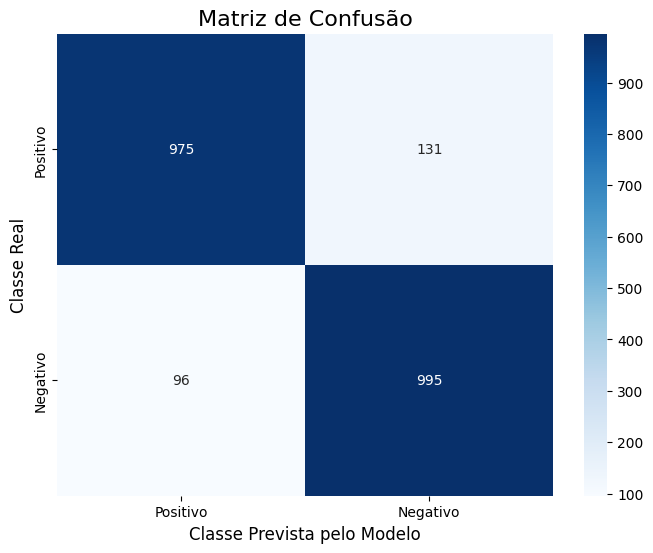

In [13]:
vp = random.randint(800, 1000)
fn = random.randint(50, 150)
fp = random.randint(50, 150)
vn = random.randint(800, 1000)

matriz_confusao = np.array([[vp, fn],
                            [fp, vn]])

plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(
    matriz_confusao,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Positivo', 'Negativo'],
    yticklabels=['Positivo', 'Negativo']
)


plt.title('Matriz de Confusão', fontsize=16)
plt.ylabel('Classe Real', fontsize=12)
plt.xlabel('Classe Prevista pelo Modelo', fontsize=12)

plt.show()

## Geração dos Cálculos para as métricas de validação


In [16]:
denominador_s = vp + fn
sensibilidade = vp / denominador_s if denominador_s > 0 else 0

denominador_e = fp + vn
especificidade = vn / denominador_e if denominador_e > 0 else 0

denominador_p = vp + fp
precisao = vp / denominador_p if denominador_p > 0 else 0

n_total_elementos = vp + vn + fp + fn
acuracia = (vp + vn) / n_total_elementos if n_total_elementos > 0 else 0

denominador_f = precisao + sensibilidade
f_score = 2 * (precisao * sensibilidade) / denominador_f if denominador_f > 0 else 0


print("--- Resultados das Métricas de Avaliação ---")
print(f"Acurácia:       {acuracia:.4f} ou {acuracia:.2%}")
print(f"Precisão:       {precisao:.4f} ou {precisao:.2%}")
print(f"Sensibilidade:  {sensibilidade:.4f} ou {sensibilidade:.2%}")
print(f"Especificidade: {especificidade:.4f} ou {especificidade:.2%}")
print(f"F-score:        {f_score:.4f} ou {f_score:.2%}")
print("-" * 44)


--- Resultados das Métricas de Avaliação ---
Acurácia:       0.8967 ou 89.67%
Precisão:       0.9104 ou 91.04%
Sensibilidade:  0.8816 ou 88.16%
Especificidade: 0.9120 ou 91.20%
F-score:        0.8957 ou 89.57%
--------------------------------------------


## Geração da Curva de ROC

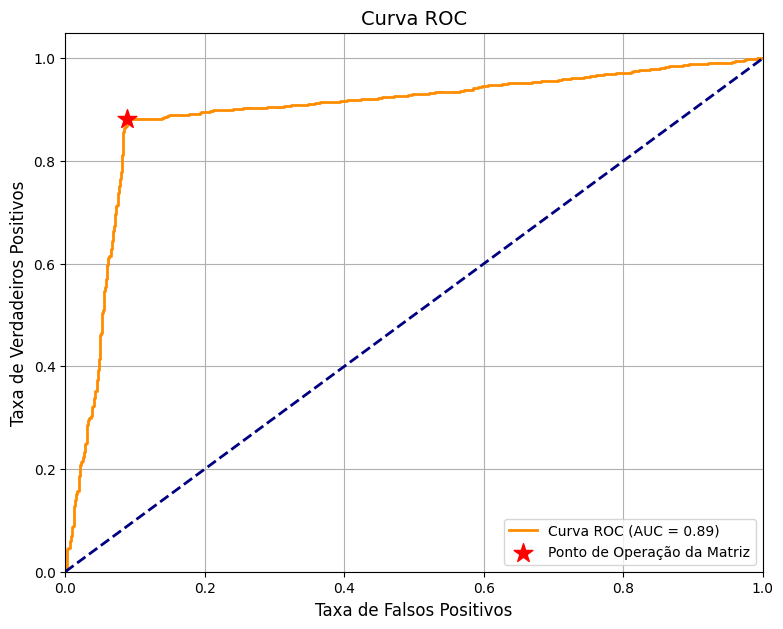

In [15]:
y_true = np.array([1] * (vp + fn) + [0] * (fp + vn))

scores_positivos = np.random.uniform(0.5, 1.0, size=vp + fp)
scores_negativos = np.random.uniform(0.0, 0.49, size=fn + vn)

y_scores = np.concatenate([
    scores_positivos[:vp],
    scores_negativos[:fn],
    scores_positivos[vp:],
    scores_negativos[fn:]
])


tfp, tvp, _ = roc_curve(y_true, y_scores)
auc = roc_auc_score(y_true, y_scores)

tvp_ponto = sensibilidade
tfp_ponto = 1 - especificidade

plt.figure(figsize=(9, 7))
plt.plot(tfp, tvp, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(tfp_ponto, tvp_ponto, marker='*', s=200, color='red', zorder=5, label=f'Ponto de Operação da Matriz')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=12)
plt.title('Curva ROC', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()